### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import matplotlib
%matplotlib notebook 
plt.set_loglevel("info")

In [3]:
from pymoo.visualization.scatter import Scatter

In [4]:
from pymooCFD.core.minimizeCFD import MinimizeCFD
from pymooCFD.problems.rans_k_eps import RANS_k_eps

In [5]:
study = MinimizeCFD(RANS_k_eps)
# from setupOpt import optRun
# from pymooCFD.studies.oscillCyl_soo import optRun
#from pymooCFD.studies.compDistOpt_x2 import optRun
#from pymooCFD.studies.oscillCyl_x2 import optRun
# from pymooCFD.studies.oscillCyl_x2 import optRun
# from pymooCFD.studies.compDistOpt_x2 import optRun

04-27 16:27:26 :: INFO     :: optStudy-RANS_k_eps :: ~~~~~~~~~~~~~~~~~~~~~~~~~~
04-27 16:27:26 :: INFO     :: optStudy-RANS_k_eps :: INITIALIZING - Pickle Path
04-27 16:27:26 :: INFO     :: optStudy-RANS_k_eps :: 	CHECKPOINT LOADED: optStudy-RANS_k_eps/MinimizeCFD.checkpoint.npy
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 	RESTART DICTONARY
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		opt_runs: []
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		case_runs: []
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDCase: <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDGeneticAlgorithm: <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDGeneticProblem: <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps :: 		abs_path: /gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps
04-27 16:27:26 :

04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		test_case: Directory: optStudy-RANS_k_eps/run00/test_case | Parameters: [0.09, 8000]
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		gen1_pop: [<pymoo.core.individual.Individual object at 0x7f0f4566b790>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4566b7f0>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4566b850>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4566b8b0>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4566b910>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4566b970>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 ::  <pymoo.core.individual.Individual object at 0x7f0f4565f340>
04

04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 	UPDATED DICTONARY
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		n_opt: 20
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		abs_path: /gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run00
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		log_level: 10
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		logger: <Logger optStudy-RANS_k_eps.run00 (DEBUG)>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		cp_init: False
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		run_path: /gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run00
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		algorithm: <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f45790ee0>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: 		problem: # name: CFDGeneticProblem
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run00 :: # n_var: 2
04-27

04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		problem: # name: CFDGeneticProblem
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: # n_var: 2
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: # n_obj: 2
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: # n_constr: 1
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		bnd_cases: [<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1b50>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1be0>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1c70>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1d00>]
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		test_case: Directory: optStudy-RANS_k_eps/run01/test_case | Parameters: [0.09, 5500] | Objectives: [4.5304773826775e-07, 5773.572]
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		gen1_pop: [<pymoo.core.individual

04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 	UPDATED DICTONARY
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		n_opt: 20
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		abs_path: /gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		log_level: 10
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		logger: <Logger optStudy-RANS_k_eps.run01 (DEBUG)>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		cp_init: False
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		run_path: /gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		algorithm: <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4577a280>
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: 		problem: # name: CFDGeneticProblem
04-27 16:27:26 :: DEBUG    :: optStudy-RANS_k_eps.run01 :: # n_var: 2
04-27

In [6]:
from IPython.display import Image, display
import glob

def showImages(listOfImageNames, **kwargs):
    if isinstance(listOfImageNames, str):
        listOfImageNames = [listOfImageNames]
    listOfImageNames = [os.path.join(opt_run.abs_path, imageName) 
                            for imageName in listOfImageNames if opt_run.abs_path not in imageName]
    listOfImageNames = [glob.glob(imageName) for imageName in listOfImageNames]
    listOfImageNames = [item for sublist in listOfImageNames for item in sublist]
    print('Showing Images')
    print(listOfImageNames)
    for imageName in listOfImageNames:
        print('DISPLAYING:', imageName)
        display(Image(filename=imageName), **kwargs)
        

In [7]:
opt_run = study.opt_runs[1]

### Check Out Data Generated

In [8]:
print(opt_run.algorithm.history)
print(len(opt_run.algorithm.history))

[<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455d9610>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455de400>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455d33d0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455c4fd0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f45671b50>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f456f86d0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455e2670>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f45580a60>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4558ce50>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4559f250>]
10


In [9]:
pprint(study.__dict__)

{'CFDCase': <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>,
 'CFDGeneticAlgorithm': <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>,
 'CFDGeneticProblem': <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>,
 'abs_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps',
 'case_runs': [<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f4577f0a0>,
 'cp_init': True,
 'log_level': 10,
 'logger': <Logger optStudy-RANS_k_eps (DEBUG)>,
 'opt_runs': [<pymooCFD.core.optRun.OptRun object at 0x7f0f457e4b20>,
              <pymooCFD.core.optRun.OptRun object at 0x7f0f457fa160>]}


In [10]:
pprint(opt_run.__dict__)

{'abs_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01',
 'algorithm': <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4577a280>,
 'bnd_cases': [<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1b50>,
 'cp_init': False,
 'gen1_pop': Population([<pymoo.core.individual.Individual object at 0x7f0f455b1eb0>,
           dtype=object),
 'log_level': 10,
 'logger': <Logger optStudy-RANS_k_eps.run01 (DEBUG)>,
 'n_opt': 20,
 'problem': <pymooCFD.core.pymooBase.CFDGeneticProblem object at 0x7f0f455d9e50>,
 'run_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01',
 'test_case': <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1d90>}


In [11]:
pprint(opt_run.algorithm.__dict__)

{'advance_after_initial_infill': True,
 'callback': <pymooCFD.core.pymooBase.PymooCFDCallback object at 0x7f0f457fafd0>,
 'data': {},
 'default_termination': <pymoo.util.termination.default.MultiObjectiveDefaultTermination object at 0x7f0f455d93a0>,
 'display': <pymooCFD.core.pymooBase.MyDisplay object at 0x7f0f457faf40>,
 'eliminate_duplicates': <pymoo.core.duplicate.DefaultDuplicateElimination object at 0x7f0f455b12e0>,
 'evaluator': <pymoo.core.evaluator.Evaluator object at 0x7f0f455d92e0>,
 'has_terminated': False,
 'history': [<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455d9610>,
 'initialization': <pymoo.core.initialization.Initialization object at 0x7f0f455b1370>,
 'is_initialized': True,
 'mating': <pymoo.core.mating.Mating object at 0x7f0f455b15e0>,
 'n_gen': 10,
 'n_offsprings': 4,
 'off': Population([<pymoo.core.individual.Individual object at 0x7f0f455b1160>,
           dtype=object),
 'opt': Population([<pymoo.core.individual.Individual object at 0x7f0f45

In [12]:
pprint(opt_run.problem.__dict__)

{'BaseCase': <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>,
 '_ideal_point': None,
 '_nadir_point': None,
 '_pareto_front': <pymoo.util.cache.Cache object at 0x7f0f455d9220>,
 '_pareto_set': <pymoo.util.cache.Cache object at 0x7f0f455d9c40>,
 'callback': None,
 'check_inconsistencies': True,
 'data': {},
 'exclude_from_serialization': [],
 'gen1Pop': None,
 'n_constr': 1,
 'n_obj': 2,
 'n_var': 2,
 'replace_nan_values_by': inf,
 'validated': False,
 'xl': array([7.2e-02, 1.0e+03]),
 'xu': array([1.08e-01, 1.00e+04])}


In [13]:
# for key in optRun.__dict__:
#     pprint("{0:15} : {1}".format(key, optRun.__dict__[key])) #str(optRun.__dict__[key]).replace('\n', '\n\t\t  ')))

In [14]:
# for key in optRun.__dict__:
#     val = str(optRun.__dict__[key]).replace('\n', '\n\t\t')
#     pprint("{0:15} : {1}".format(key, val))

# Pre-Process Optimization Study

### Test Case

In [15]:
print(opt_run.test_case)
opt_run.test_case

Directory: optStudy-RANS_k_eps/run01/test_case | Parameters: [0.09, 5500] | Objectives: [4.5304773826775e-07, 5773.572]


In [16]:
pprint(opt_run.test_case.__dict__)

{'_f': [4.5304773826775e-07, 5773.572],
 '_g': -9.546952261732251e-06,
 '_x': [0.09, 5500],
 'abs_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/test_case',
 'cp_init': False,
 'datFile': 'residuals.dat',
 'inputFile': 'exec.jou',
 'jobFile': 'jobslurm.sh',
 'log_level': 10,
 'logger': <Logger optStudy-RANS_k_eps.run01.test_case (DEBUG)>,
 'meshFile': None,
 'meshSF': 1.0,
 'mesh_study': <pymooCFD.core.meshStudy.MeshStudy object at 0x7f0f455b1df0>,
 'msCases': None,
 'numElem': None,
 'obj_labels': ['Average of Residuals', 'Wall Time'],
 'restart': True,
 'solnTime': 5803.627708911896,
 'validated': False,
 'var_labels': ['Turbulent Viscosity Constant', 'Number of Iterations']}


In [17]:
print(opt_run.test_case.msCases)

None


In [18]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in opt_run.test_case.msCases:
        pprint(case.__dict__)
        print()

No Mesh Study Cases for Test Case


In [19]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    print('Mesh Size Factors:', opt_run.test_case.meshSFs)

No Mesh Study Cases for Test Case


In [20]:
if opt_run.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in opt_run.test_case.msCases:
        print(case)
        print('\t Objectives:', case._f)
#     print('\tParameters:', case._x, '\t Objectives:', case._f)

No Mesh Study Cases for Test Case


##### Update Test Case

In [21]:
# opt_run.appendMeshSFs(opt_run.test_case, [1.2])

In [22]:
# newMeshSFs = np.round(np.arange(0.3, 1.5, 0.1))
# opt_run.saveCP()
# opt_run.test_case.meshSFs

### Boundary Cases

In [23]:
print(opt_run.bnd_cases)

[<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1b50>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1be0>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1c70>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1d00>]


In [24]:
if opt_run.bnd_cases is not None:
    for case in opt_run.bnd_cases:
        print(case)

Directory: optStudy-RANS_k_eps/run01/boundary-cases/0.072_1e+03 | Parameters: [7.2e-02 1.0e+03]
Directory: optStudy-RANS_k_eps/run01/boundary-cases/0.072_1e+04 | Parameters: [7.2e-02 1.0e+04]
Directory: optStudy-RANS_k_eps/run01/boundary-cases/0.108_1e+03 | Parameters: [1.08e-01 1.00e+03]
Directory: optStudy-RANS_k_eps/run01/boundary-cases/0.108_1e+04 | Parameters: [1.08e-01 1.00e+04]


In [25]:
if opt_run.bnd_cases is not None:
    bnd_vars = np.array([case.x for case in opt_run.bnd_cases])
    print(bnd_vars)

[[7.20e-02 1.00e+03]
 [7.20e-02 1.00e+04]
 [1.08e-01 1.00e+03]
 [1.08e-01 1.00e+04]]


<IPython.core.display.Javascript object>


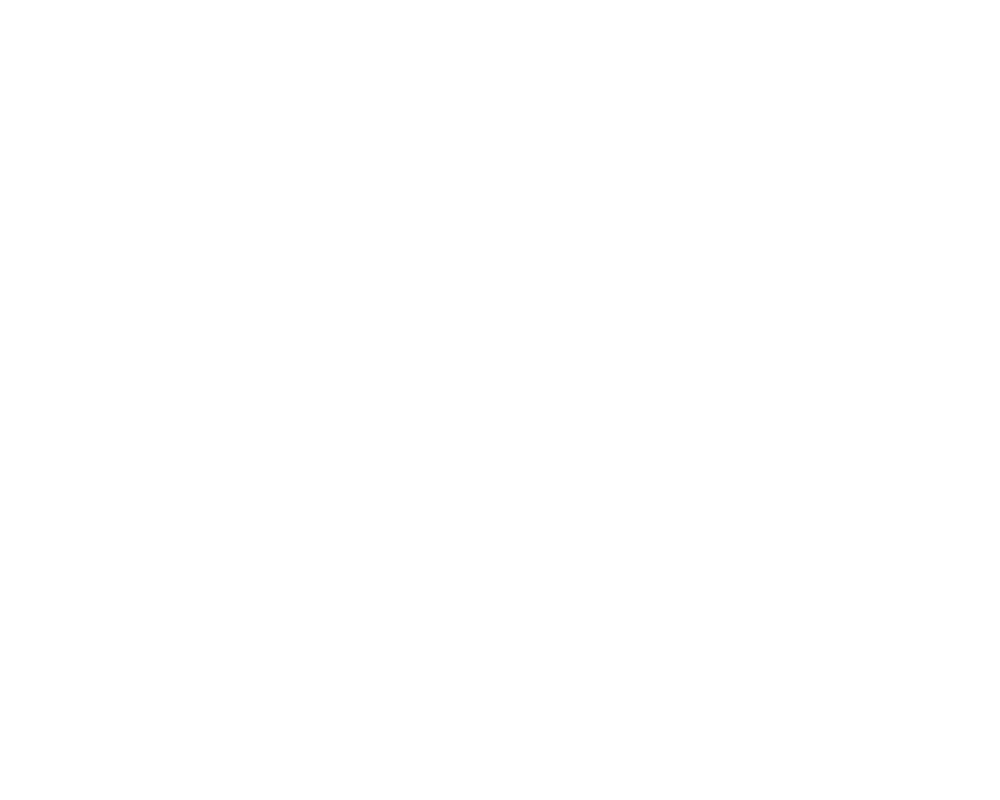

In [26]:
if opt_run.bnd_cases is not None:
    plot = Scatter(title='Design Space: Boundary Cases', 
                   legend=True,
                   labels=opt_run.problem.BaseCase.var_labels, 
                   figsize=(10,8)
                  )
    for var in bnd_vars:
        plot.add(var, label='[%.2f, %.2f]'%(var[0],var[1]), s=80)
#     path = os.path.join(opt_run.rel_path, 'boundary-cases', 'bndPts_plot-varSpace.png')
#     plot.save(path, dpi=100)
    plot.show()

In [27]:
if opt_run.bnd_cases is not None:
    bnd_objs = np.array([case.f for case in opt_run.bnd_cases])
    print(bnd_objs)

[None None None None]


In [28]:
if None not in bnd_objs:
    plot = Scatter(title= 'Objective Space: Boundary Cases', 
                   legend = True, 
                   labels=opt_run.problem.BaseCase.obj_labels, 
                   figsize=(10,8)
                  )
    for obj in bndObjs:
        plot.add(obj, label='[%.2f, %.2f]'%(obj[0],obj[1]), s=70, alpha=1)
    path = os.path.join(opt_run.runDir, 'boundary-cases', 'bndPts_plot-objSpace.png')
    plot.save(path, dpi=100)
    plot.show()

In [29]:
if None not in bnd_objs:
    # Non-dominated Sorting of Boundary Cases
    n_survive = 1
    F = np.array([case.f for case in opt_run.bnd_cases])
    X = np.array([case.x for case in opt_run.bnd_cases])
    from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
    nds = NonDominatedSorting()
    # do the non-dominated sorting until splitting front
    fronts = nds.do(F, n_stop_if_ranked=n_survive)
    front = fronts[0]
    nonDom_CCobj = F[front, :][0]
    nonDom_CCvar = X[front, :][0]
    print('Non-dominated: Boundary Cases')
    print('Parameters-', nonDom_CCvar)
    print('Objectives-', nonDom_CCobj)

### Mesh Studies

In [30]:
pprint(opt_run.test_case.mesh_study.__dict__)

{'_size_factors': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]),
 'base_case': <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f0f455b1d90>,
 'cases': None,
 'folder': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/test_case/mesh_study',
 'logger': <Logger pymooCFD.core.meshStudy./gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/test_case/mesh_study (WARNING)>}


In [31]:
print(opt_run.test_case.mesh_study.cases)

None


### Generation 1

In [32]:
print(len(opt_run.algorithm.history))
print(opt_run.algorithm.history)

10
[<pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455d9610>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455de400>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455d33d0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455c4fd0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f45671b50>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f456f86d0>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f455e2670>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f45580a60>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4558ce50>, <pymooCFD.core.pymooBase.CFDGeneticAlgorithm object at 0x7f0f4559f250>]


In [33]:
print(len(opt_run.algorithm.history[0].pop))

30


##### Generation 1: Parameter Space

In [34]:
# opt_run.plotDir = os.path.join(opt_run.optDatDir, 'plots')
# os.mkdir(opt_run.plotDir)
# opt_run.problem.BaseCase.var_labels = ['Number of Tasks', 'Number of CPUs per Task']
# print(opt_run.problem.BaseCase.var_labels)

<IPython.core.display.Javascript object>


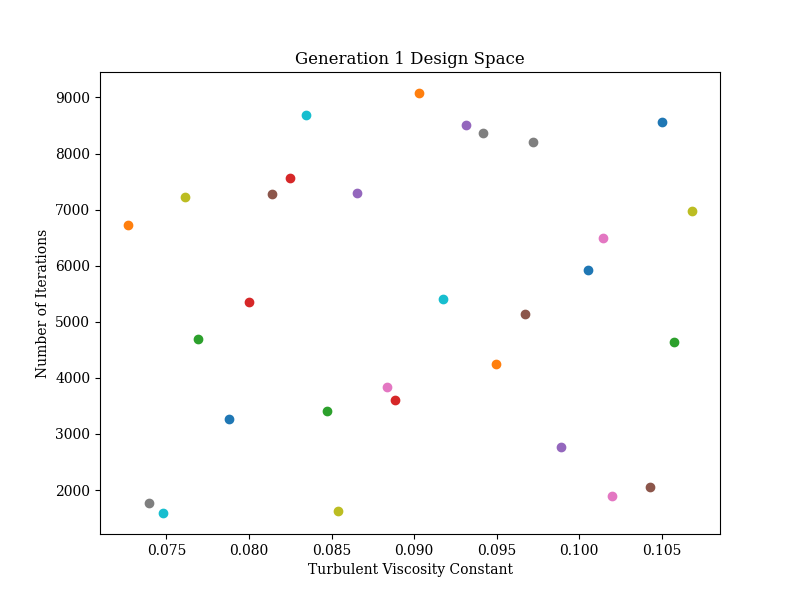

In [35]:
popX = opt_run.algorithm.history[0].pop.get('X')
gen = opt_run.algorithm.history[0].n_gen
if len(popX) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Design Space', 
               legend=leg, 
               labels=opt_run.problem.BaseCase.var_labels,
#                figsize=(10,8)
              )
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
# plot.save(os.path.join(opt_run.plotDir, 'gen1_var_space.png'), dpi=100)
plot.show()

##### Generation 1: Objective Space

<IPython.core.display.Javascript object>


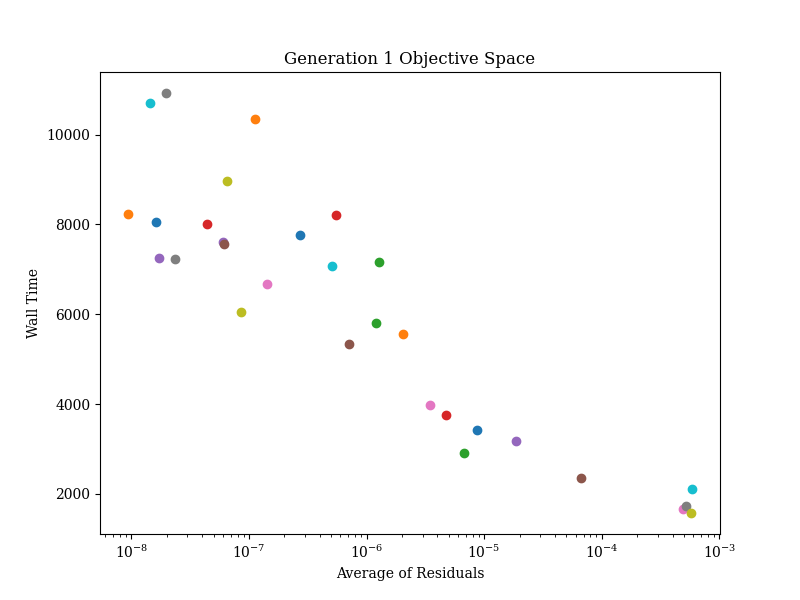

In [36]:
popF = opt_run.algorithm.history[0].pop.get('F')
gen = opt_run.algorithm.history[0].n_gen
if len(popF) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Objective Space', 
               legend=leg, 
               labels=opt_run.problem.BaseCase.obj_labels
              )
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
plot.do()
plot.ax.set_xscale('log')
# save parameter space plot
# plot.save(os.path.join(opt_run.plotDir, 'gen1_obj_space.png'), dpi=100)
# print(os.path.join(opt_run.plotDir, 'gen1_obj_space.png'))
plot.show()

### Generation 1: Mapping Parameters to Objectives
Remember that for each plot the parameters(s) not labeled are also varying. 

Therefore, if a strong relationship is seen in these plots then it is likely a relationship independent of the other variable.


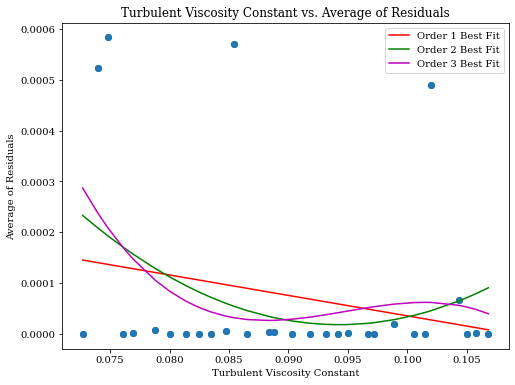

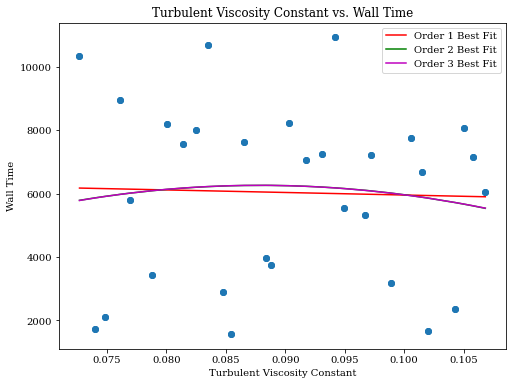

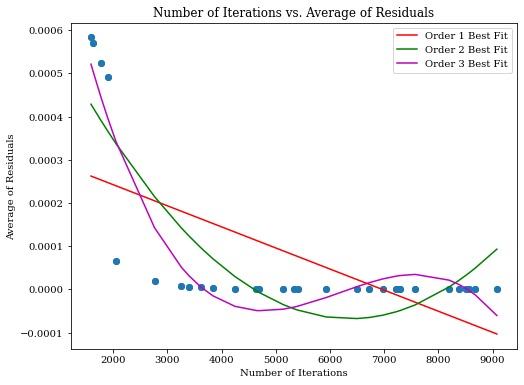

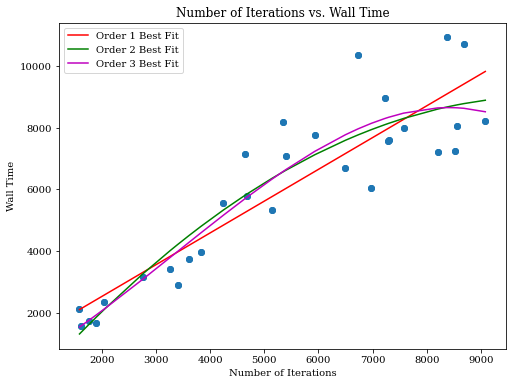

In [88]:
plots, map_paths = opt_run.map_gen1()

In [89]:
# %matplotlib inline

In [86]:
plots[0].show()

In [83]:
plots[1].show()
print(mapPaths)

['/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/map_gen1/Turbulent_Viscosity_Constant-vs-Average_of_Residuals.png', '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/map_gen1/Turbulent_Viscosity_Constant-vs-Wall_Time.png', '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/map_gen1/Number_of_Iterations-vs-Average_of_Residuals.png', '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/map_gen1/Number_of_Iterations-vs-Wall_Time.png']


In [90]:
plots[0].ax.set_xscale('log')
plots[0].save(map_paths[0])
plots[0].show()

In [41]:
# p = plots[0]
# p.show()

In [42]:
# from IPython.display import Image, display
# map_paths = [os.path.join(opt_run.mapDir, ent) for ent in os.listdir(opt_run.mapDir) if ent.endswith('.png')]
# for path in map_paths:
#     display(Image(filename=path))

# Post-Process Optimization Study

### Optimization Algorithm Convergence

In [43]:
#hist = opt_run.algorithm.history
#print(hist)
#print(opt_run.algorithm.callback)
#for alg in hist:
#    print(alg)
#    print(alg.callback)
# n_evals = np.array([e.evaluator.n_eval for e in hist])
# print('Number of Evaluations:', n_evals)

In [44]:
opt_avg = []
for h in opt_run.algorithm.history:
    F_opt = np.array([o.F for o in h.opt])
    F_avg = np.mean(F_opt, axis=0)
    #print(F_avg)
    opt_avg.append(F_avg)
opt_avg = np.array(opt_avg)
# print(opt_avg)

In [45]:
n_gen = [alg.n_gen for alg in opt_run.algorithm.history]
for obj_i in range(opt_run.problem.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_avg[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Mean')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Mean of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [46]:
opt_minL = 1000
hist = opt_run.algorithm.history
for h in hist:
    l = len(h.opt)
    if l < opt_minL:
        opt_minL = l
print('Optimum minimum length:', opt_minL)
opt_sum = []
for h in hist:
    F_opt = np.array([o.F for o in h.opt[:opt_minL]])
    F_sum = np.sum(F_opt, axis=0)
#     print(F_sum)
    opt_sum.append(F_sum)
opt_sum = np.array(opt_sum)

Optimum minimum length: 9


In [47]:
n_gen = [alg.n_gen for alg in opt_run.algorithm.history]
for obj_i in range(opt_run.problem.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_sum[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Sum')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Sum of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [48]:
hist = opt_run.algorithm.history
opt = np.array([alg.opt[0].F for alg in hist])
n_gen = [alg.n_gen for alg in hist]
for obj_i in range(len(opt[0])):
    opt_obj = opt[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Optimum')
    plt.title(f'Objective {obj_i+1}: {opt_run.problem.BaseCase.obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Optimum')
#     plt.yscale("log")
    plt.savefig(os.path.join(opt_run.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

### Performance Indicator - Hypervolume
https://pymoo.org/misc/performance_indicator.html#Hypervolume

Maximize hypervolume from reference point. 

In [49]:
all_obj = [alg.pop.get('F') for alg in hist]

In [50]:
mean_all_obj = []
for obj_i in range(opt_run.problem.BaseCase.n_obj):
    mean_all_obj.append(np.mean([np.mean(obj_g[:,obj_i]) for obj_g in all_obj]))
print(mean_all_obj)

[9.398355536249732e-06, 6778.11783]


In [51]:
mean_g1_obj = []
popF = hist[-1].pop.get('F')
for obj_i in range(opt_run.problem.BaseCase.n_obj):
    mean_g1_obj.append(np.mean(popF[:,obj_i]))
print(mean_g1_obj)

[1.6222422760374466e-06, 6697.773400000001]


In [52]:
ref_pt = [4, 4]
ref_pt = mean_g1_obj
ref_pt = mean_all_obj
sf = 100000
ref_pt = [mean_obj*sf for mean_obj in mean_g1_obj]

In [53]:
from pymoo.factory import get_performance_indicator
hv = get_performance_indicator("hv", ref_point=np.array(ref_pt))

In [54]:
for gen, alg in enumerate(opt_run.algorithm.history):
    print('Generation', gen+1, f"hypervolume {hv.do(alg.pop.get('X'))}")

Generation 1 hypervolume 59971847.628821954
Generation 2 hypervolume 60121677.84085504
Generation 3 hypervolume 60121624.903625876
Generation 4 hypervolume 60121593.554943874
Generation 5 hypervolume 60121593.554943874
Generation 6 hypervolume 60121593.554943874
Generation 7 hypervolume 60121593.554943874
Generation 8 hypervolume 60072113.606521934
Generation 9 hypervolume 60072113.606521934
Generation 10 hypervolume 60072113.606521934


### Latest Generation 

In [55]:
max_disp_len = 10

In [56]:
if len(opt_run.algorithm.pop.get('X')) < max_disp_len:
    print('FINAL POPULATION')
    print('Parameters')
    print(opt_run.algorithm.pop.get('X'))
    print('Objectives')
    print(opt_run.algorithm.pop.get('F'))

In [57]:
latest_pop = opt_run.algorithm.history[-1].pop
latest_popX = latest_pop.get('X')
latest_popF = latest_pop.get('F')

<IPython.core.display.Javascript object>


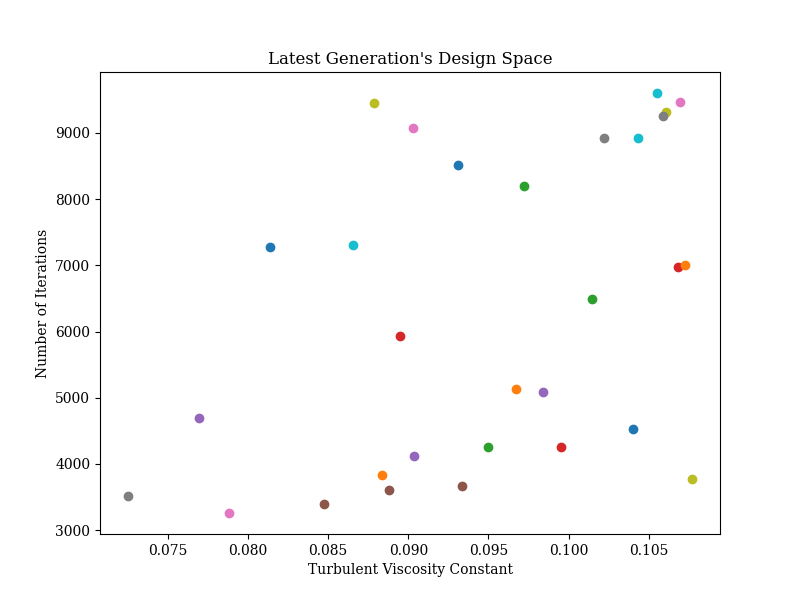

In [58]:
plot = Scatter(title='Latest Generation\'s Design Space', legend=False, labels=opt_run.problem.BaseCase.var_labels)
for ind_i, ind in enumerate(latest_popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(opt_run.plotDir, 'latest_var_space.png'), dpi=100)
plot.show()

<IPython.core.display.Javascript object>


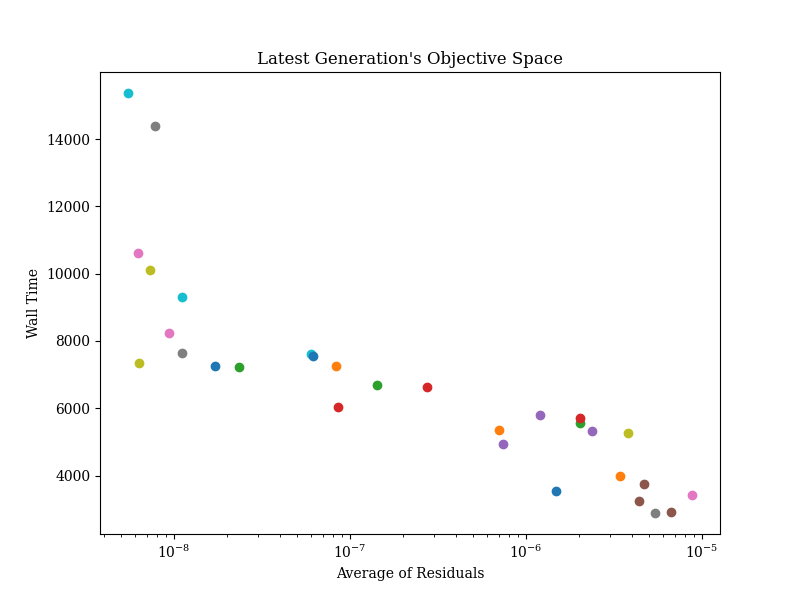

In [59]:
plot = Scatter(title='Latest Generation\'s Objective Space', 
               legend=False, 
               labels=opt_run.problem.BaseCase.obj_labels,
               s=60,
               alpha=0.9
              )
for ind_i, ind in enumerate(latest_popF):
    plot.add(ind, label=f'IND {ind_i+1}')
plot.do()
plot.ax.set_xscale('log')
# save objective space plot
plot.save(os.path.join(opt_run.plotDir, 'latest_obj_space.png'), dpi=100)
plot.show()

### Optimum

In [60]:
assert opt_run.algorithm.opt is not None
print('Number of Optimum:', len(opt_run.algorithm.opt))

Number of Optimum: 11


In [61]:
# opt_run.problem.BaseCase.var_labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
print(opt_run.problem.BaseCase.var_labels)
print()
labels = ["Amplitude", "Frequency", "Reynolds Number"]
labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
n_dim = len(opt_run.problem.BaseCase.var_labels)
labels_proc = [f"${labels}_{{{i}}}$" for i in range(1, n_dim + 1)]
if isinstance(labels, list):
    print(labels)
    
print(labels_proc)

['Turbulent Viscosity Constant', 'Number of Iterations']

['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']
["$['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']_{1}$", "$['Amplitude [radians/s]', 'Frequency [cycles/s]', 'Reynolds Number']_{2}$"]


In [62]:
#opt_run.problem.BaseCase.var_labels = opt_run.problem.BaseCase.var_labels.tolist()

In [63]:
n_opt_disp = 10

In [64]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[::2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[::2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-Re-Amp.png'), dpi=100)
# varPlot.show()

In [65]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[:2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[:2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-freq-Amp.png'), dpi=100)
# varPlot.show()

In [66]:
# opt_pop = opt_run.algorithm.opt[:n_opt_disp]
# gen = opt_run.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{opt_run.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=opt_run.problem.BaseCase.var_labels[1:],
#                   legend=leg
#                  )
# #varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[1:], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace-Re-freq.png'), dpi=100)
# varPlot.show()

<IPython.core.display.Javascript object>


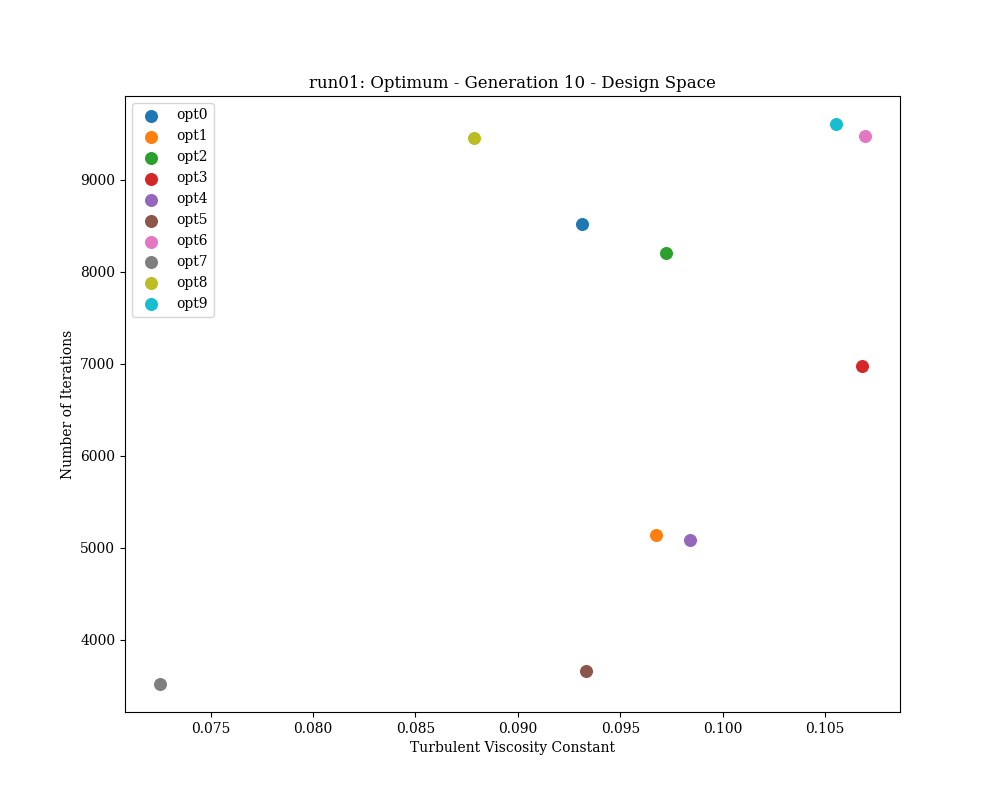

In [67]:
opt_pop = opt_run.algorithm.opt[:n_opt_disp]
gen = opt_run.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
varPlot = Scatter(title=f'{opt_run.data_folder}: Optimum - Generation {gen} - Design Space', 
                  figsize=(10,8),
                  labels=opt_run.problem.BaseCase.var_labels,
                  legend=leg
                 )
varPlot.axis_labels = opt_run.problem.BaseCase.var_labels
for opt_i, opt in enumerate(opt_pop):
    varPlot.add(opt.get('X'), label=f'opt{opt_i}', s=70)
varPlot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-varSpace.png'), dpi=100)
varPlot.show()

<IPython.core.display.Javascript object>


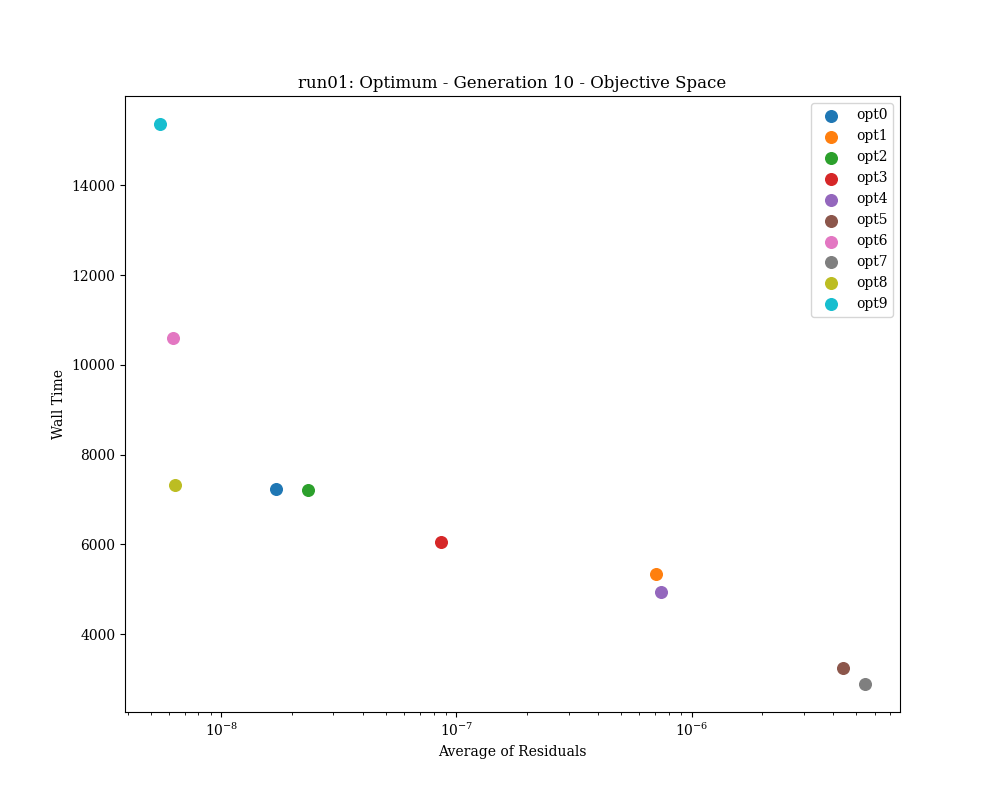

In [68]:
opt_pop = opt_run.algorithm.opt[:n_opt_disp]
gen = opt_run.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
plot = Scatter(title=f'{opt_run.data_folder}: Optimum - Generation {gen} - Objective Space', 
                  figsize=(10,8),
                  labels=opt_run.problem.BaseCase.obj_labels,
                  legend=leg
                 )
for opt_i, opt in enumerate(opt_pop):
    plot.add(opt.get('F'), label=f'opt{opt_i}', s=70)
plot.do()
plot.ax.set_xscale('log')
plot.save(os.path.join(opt_run.plotDir, f'optimum-gen{gen}-objSpace.png'), dpi=100)
plot.show()

### Print Every Generation

In [69]:
if opt_run.algorithm.n_gen < 10 and len(opt_run.algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

### All Design Points

<IPython.core.display.Javascript object>


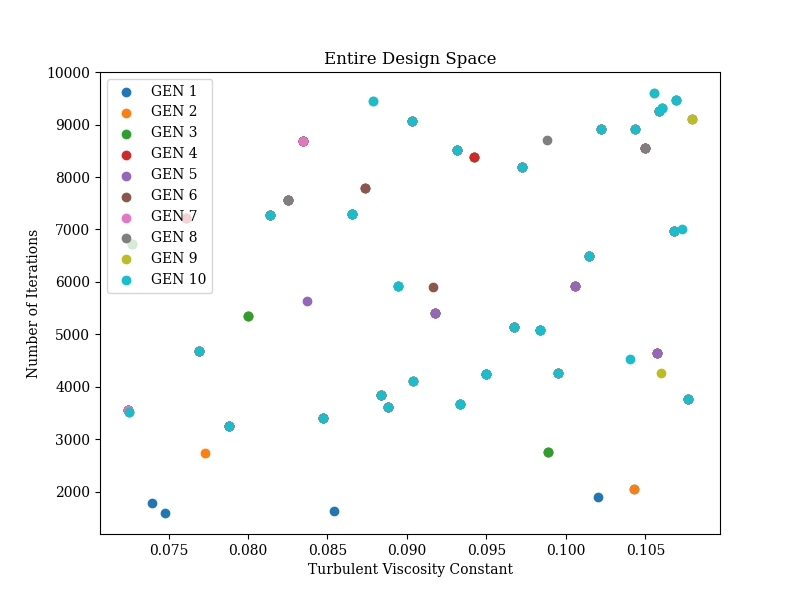

In [70]:
if opt_run.problem.BaseCase.n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if opt_run.algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=opt_run.problem.BaseCase.var_labels)
    for g, alg in enumerate(hist):
        plot.add(alg.pop.get('X'), label=f'GEN {g+1}')

# save plot to png file
plot.save(os.path.join(opt_run.plotDir, 'entire_design_space.png'), dpi=100)
plot.show()

### All Objective Points

<IPython.core.display.Javascript object>


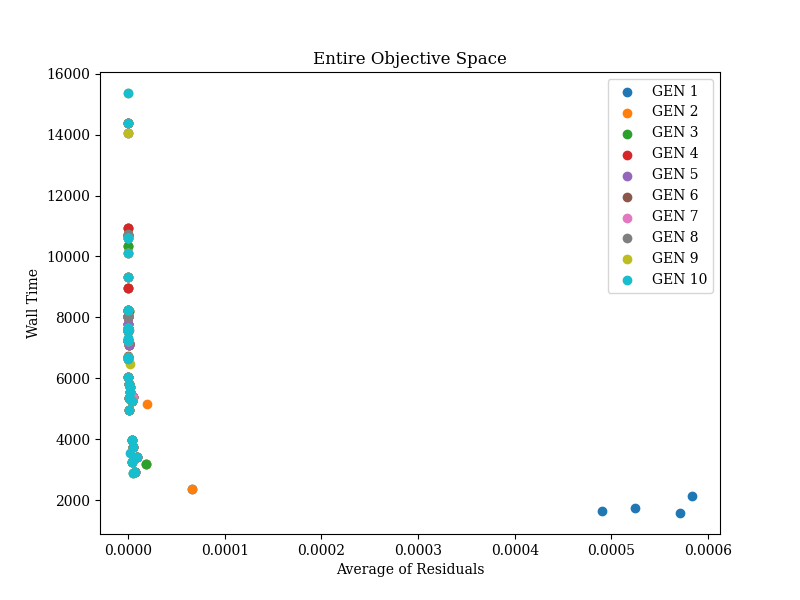

In [71]:
if opt_run.algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=opt_run.problem.BaseCase.obj_labels)
for g, alg in enumerate(hist):  # range(algorithm.n_gen)
#     if g == 0:
#         continue
    plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(os.path.join(opt_run.plotDir, 'entire_obj_space.png'), dpi=100)
plot.show()

<IPython.core.display.Javascript object>


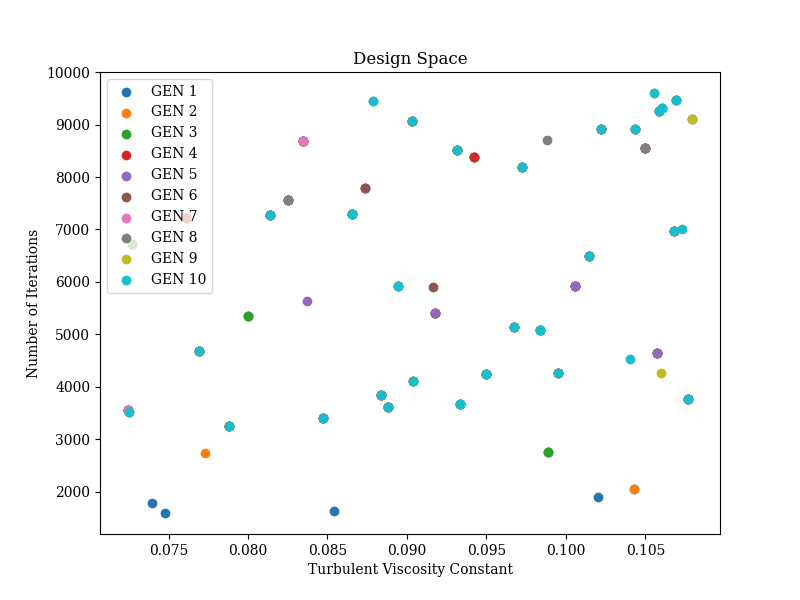

<IPython.core.display.Javascript object>


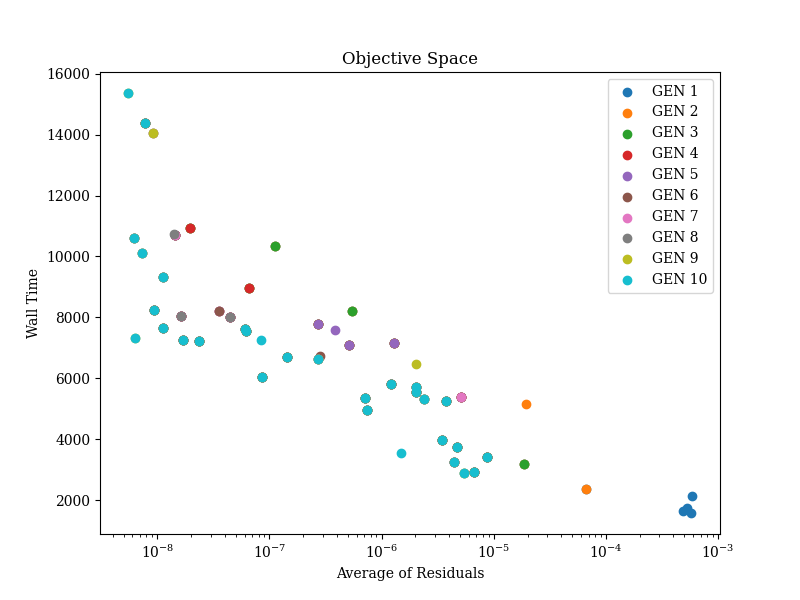

In [72]:
gens = range(1, len(opt_run.algorithm.history)+1)
var_plot, obj_plot = opt_run.plotGens(gens)
obj_plot.ax.set_xscale('log')
obj_plot.show()

In [73]:
# def plotOptSpaces(self, algs, fileName, folder=None , maxLegLen=15):
#     if folder is None:
#         folder = self.plotDir
#     if len(algs) < maxLegLen:
#         leg = True
#     else:
#         leg = False
#     obj_plot = Scatter(title='Objective Space', legend=leg, labels=self.BaseCase.obj_labels)
#     var_plot = Scatter(title='Design Space', legend=leg, labels=self.BaseCase.var_labels)
#     for g, alg in enumerate(algs):  # range(algorithm.n_gen)
#         obj_plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
#         var_plot.add(alg.pop.get('X'), label=f'GEN {g+1}')
#     obj_plot.save(os.path.join(folder, fileName+'-obj_space.png'), dpi=100)
#     var_plot.save(os.path.join(folder, fileName+'-var_space.png'), dpi=100)
#     #plot.show()

### Last 10 Generation of Parameter Space

In [74]:
# Last 10 generations
# last 10 gens. design points
hist = opt_run.algorithm.history
if opt_run.algorithm.n_gen > 10:
    #### Design Space ####
    if opt_run.problem.BaseCase.n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, 
                       figsize=(10, 8),
                       labels=opt_run.problem.BaseCase.var_labels
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('X'), label=f'GEN {g+1}',
                     alpha=0.8
                    )
    # save design space plot
    plot.save(os.path.join(opt_run.plotDir, 'final_10_design_space.png'), dpi=100)
    plot.show()

### Last 10 Generation of Objective Space

In [75]:
### Objective Space ####
if opt_run.algorithm.n_gen > 10:
    if opt_run.problem.BaseCase.n_obj >3:
        plot = Scatter()
        plot.add(opt_run.algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', 
                       legend=True, 
                       labels=opt_run.problem.BaseCase.obj_labels,
                       figsize=(10,8)
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('F'), label=f'GEN {g+1}')

    # save objective space plot
    plot.save(os.path.join(opt_run.plotDir, 'final_10_obj_space.png'), dpi=100)
    plot.show()

### Extract Data 

In [76]:
checkpoint = opt_run.algorithm

In [77]:
# is the full history of the algorithm saved? 
print('Checkpoint Objective Population:\n', checkpoint.pop.get('F')[:5])
if np.all(checkpoint.pop.get('F')) is not None: 
    algorithm = checkpoint
    print('Checkpoint @ end of generation')
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')
else:
    print('Checkpoint mid-generation')
    print('     "algorithm" variable represents last completed generation')
    print('     "algorithm.callback" unusable with history objects')
    algorithm = checkpoint.history[-1]
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')

Checkpoint Objective Population:
 [[1.70974480e-08 7.24225600e+03]
 [7.03722186e-07 5.34159900e+03]
 [2.33655034e-08 7.22280200e+03]
 [8.59413503e-08 6.04276200e+03]
 [7.45004380e-07 4.94945500e+03]]
Checkpoint @ end of generation
     Generation - 10, 11


# Preperation for Continuation

In [78]:
pprint(opt_run.algorithm.termination.__dict__)
opt_run.algorithm.termination

{'force_termination': False, 'n_max_gen': 20}


In [79]:
from pymoo.factory import get_termination
term = get_termination('n_gen', 30)
print(term)

In [80]:
# opt_run.algorithm.termination = term
#opt_run.saveCP()